<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/magdiplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Original Height and Width: 1920 x 1080
Resized Height and Width: 300 x 300


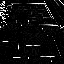

In [23]:
image = cv2.imread('/content/drive/MyDrive/diplom/photos/IMG_1771_000.jpg')
#cv2_imshow(image)
h,w,c = image.shape
print("Original Height and Width:", h,"x", w)
down_width = 300
down_height = 300
down_points = (down_width, down_height)
resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)
#cv2_imshow(image)
h1,w1,c1 = resized_down.shape
print("Resized Height and Width:", h1,"x", w1)

dst = cv2.edgePreservingFilter(resized_down, flags=1, sigma_s=60, sigma_r=0.4)
#cv2_imshow(dst)

gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)


lap_img = cv2.Laplacian(gray, cv2.CV_64F, ksize=5)
#cv2_imshow(lap_img)

width64 = 64
height64 = 64
down_points_64 = (width64, height64)
resized_img64 = cv2.resize(lap_img, down_points_64, interpolation= cv2.INTER_LINEAR)
cv2_imshow(resized_img64)